# MiniProjeto 1 - Identificação de distribuições

## Objetivo

O objetivo deste projeto é identificar quais distribuições (pdf - funções de densidade de probabilidade - no caso contínuo, ou pmf - funções de probabilidade - no caso discreto) descrevem bem as variáveis quantitativas extraídas de *datasets*.

O resultado final esperado é um relatório que identifique, com bons argumentos, modelos probabilísticos para uma variável quantitativa e uma variável qualitativa de um ou mais *datasets*.

Este projeto é **estritamente individual**.


## O que deve ser feito

Você precisa escolher duas variáveis, uma quantitativa e uma qualitativa, em *datasets* públicos de sua escolha. As duas variáveis podem vir do mesmo *dataset*.

Limpe e prepare os dados para processamento (tratando valores `NaN`, `N/A`, por exemplo). Fique atento ao dicionário de dados (se houver) para identificar quais colunas de fato são quantitativas e eventualmente remover valores inválidos.

A seguir, estude as variáveis escolhidas e procure identificar DUAS possíveis funções que podem descrever sua probabilidade de ocorrência.

Sugerimos que o trabalho siga as seguintes fases:

1. Seleção de um *dataset* e escolha de variáveis quantitativas adequadas.
2. Limpeza do *dataset*, se necessário.
3. Inspeção visual da distribuição das variáveis escolhidas - usando um histograma, por exemplo.
4. Formulação de hipóteses sobre a forma da distribuição dos dados.
5. Tentativa de estimar os parâmetros da família de distribuições escolhida no item acima a partir dos dados. Obs: As distribuições do pacote `scipy.stats` têm uma função chamada `fit()` que procura estimar os parâmetros a partir do conjunto de dados. Cada distribuição possui parâmetros estimados diferentes.
6. Análise do histrograma vs. o plot teórico de cada distribuição escolhida.
7. Análise da frequência relativa acumulada vs. a função de probabilidade acumulada (cdf) de cada.
8. Análise do Q-Q-Plot (quantil amostral vs. quantil teórico).
9. Teste de aderência para a distribuição. Como você irá comparar o resultado dos dois ajustes?
10. Escreva uma conclusão sobre os resultados obtidos.

Não há restrições em relação à base de dados a utilizar, **desde que não seja a mesma base da PNAD já usada na disciplina**. Aconselha-se evitar variáveis de bases com pequeno tamanho amostral.

Tornamos disponível uma [Lista de datasets](https://docs.google.com/document/d/1zzc__WZp-gVrpK6zHqfDZr0vyqz2FwyTKIM2TtoEZ-g/pub "Datasets interessantes") que pode ajudar nesta fase do trabalho. Você não precisa ficar restrito a esta lista.

## Entregáveis esperados e datas

Item | Data | Descrição
---|---|---
Indicação de dataset | 14/09/2016 | Indicar datasets e variáveis de interesse.
Relatório final| 21/09/2016| Notebook completo com os itens descritos acima.


In [1]:
%matplotlib inline
import pandas as pd
from scipy.stats import norm, expon, chi2
import numpy as np
import matplotlib.pyplot as plt
import os 
from numpy import linspace

#importantando todas as bibliotecas necessárias.


In [4]:
pib = pd.read_csv('pib_percapita.csv', encoding = "ISO-8859-1") #chamando a base de dados


In [5]:
PIB = pib[pib["PIB"] ==0 ] #este primeiro filtro foi utilizado para . 

In [6]:
pib.PIB_percapita.describe() #comando para dividir as pessoas por faixas de renda. 
faixas = (0, 500,1000,1500,2000,2500,3000,3500,4000,4500,5000, 5500, 6000, 6500, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000)
pib.PIB_percapita.value_counts(bins=faixas) 

#TESTE

3500     435
4000     393
3000     389
7000     321
10000    320
9000     300
4500     289
8000     287
11000    280
12000    251
5000     217
14000    189
13000    182
5500     170
6000     164
2500     150
15000    148
6500     138
16000    121
17000     97
18000     79
19000     73
20000     68
21000     52
24000     38
22000     38
23000     36
25000     31
26000     29
28000     22
27000     21
29000     20
2000      14
1500       2
1000       0
500        0
0          0
Name: PIB_percapita, dtype: int64

5770.28222656
42109.9244751


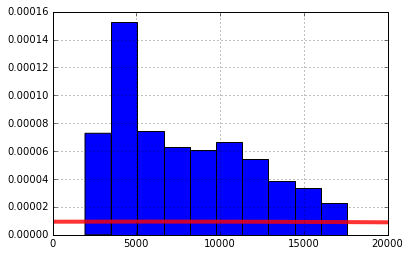

In [62]:

x = pib[pib.PIB_percapita < 17600].PIB_percapita.hist(normed=True) #gráficos de divisão de renda por faixas de interesse.
print(mean)
print(std)


mu = mean
sigma = std
x = np.linspace(100, 20000, 100000)
plt.plot(x, norm.pdf(x,loc=mu,scale=sigma),'red',alpha=0.8,lw=4) # Plota a densidade de probabilidade de distribuição

Plotamos um histograma da variável PIB percapita, para melhorar o filtro utulizamos um teto de 20 salários mínimos. O salário mínimo de 2016 é  880,00. 20 salários somam um total de 17.600,00. O objetivo deste corte é excluir as rendas altas, acima de 20 salários. Em outras palavras retirar outliers dos dados. 

Analisando os resultados do gráfico, podemos perceber um outliers entre 4000 e 6000 reais. No primeiro momento vamos levar esse dado em consideração, na escolha de um modelo estátistico discreto. Que melhor se aproxime do nosso histograma sobre PIB percapita. Estudamos a fundo os modelos, percebuma semelhança muito grande com o modelo exponencial n=10.

5770.28222656
42109.9244751


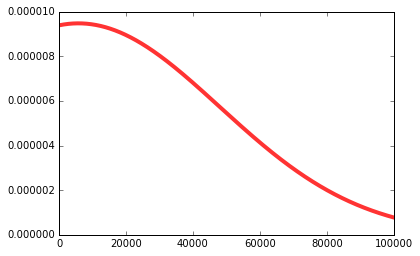

In [55]:
x = expon.fit(pib[pib.PIB_percapita < 17600].PIB_percapita)

print(mean)
print(std)


mu = mean
sigma = std
x = np.linspace(10, 100000, 17600)
plt.plot(x, norm.pdf(x,loc=mu,scale=sigma),'red',alpha=0.8,lw=4) # Plota a densidade de probabilidade de distribuição

In [10]:
pib[pib.PIB_percapita < 17600].PIB_percapita.describe()

count     4817.000000
mean      7961.272620
std       4076.827786
min       1929.969971
25%       4239.149902
50%       7163.270020
75%      11065.639648
max      17588.380859
Name: PIB_percapita, dtype: float64

In [11]:
mean = 7961.272620
std = 4076.827786
print(expon.cdf(17600, mean, std)) #cdf é a integral da pdf.
print(expon.ppf(0.05, mean, std)) #cdf é a integral da pdf.



0.905982224216
8170.38654779


In [12]:
pib.PIB.describe()

count    5.566000e+03
mean     5.820203e+05
std      6.345809e+06
min      5.770282e+03
25%      3.842817e+04
50%      8.059172e+04
75%      2.062760e+05
max      3.893172e+08
Name: PIB, dtype: float64

In [13]:
mean = 5.820203e+05
std = 6.345809e+06
print(expon.cdf(100000000, mean, std)) #cdf é a integral da pdf.
print(expon.ppf(0.05, mean, std)) #cdf é a integral da pdf.

0.999999842952
907517.749164


5770.28222656
42109.9244751


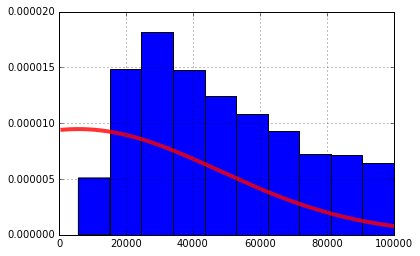

In [30]:
x = pib[pib.PIB < 100000].PIB.hist(normed=True)
print(mean)
print(std)

mu = mean
sigma = std
x = np.linspace(1000, 100000, 100000)
plt.plot(x, norm.pdf(x,loc=mu,scale=sigma),'red',alpha=0.8,lw=4) # Plota a densidade de probabilidade de distribuição

5770.28222656
42109.9244751


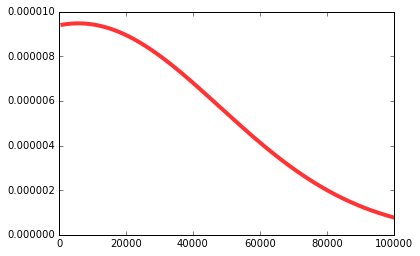

In [58]:
x = expon.fit(pib[pib.PIB < 100000].PIB)
print(mean)
print(std) 

mu = mean
sigma = std
x = np.linspace(1000, 100000, 100000)
plt.plot(x, norm.pdf(x,loc=mu,scale=sigma),'red',alpha=0.8,lw=4) # Plota a densidade de probabilidade de distribuição


Plotamos um histograma da variável PIB, usamos um filtro no valor de 100.000,00. Uma quantia não muito alta para o estudo do PIB, por exemplo. Ficou claro que se trata do gráfico de uma normal, porém com uma cauda muito grande do lado direito. Outro ponto importante é que a função fit() que consegui estimar os parâmetros, acertou com precisção a média e o desvio padrão do filtro. 

5770.28222656
42109.9244751


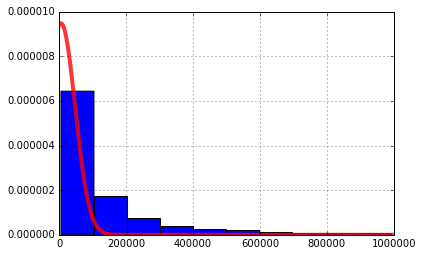

In [65]:
x = pib[pib.PIB < 1000000].PIB.hist(normed=True)
print(mean)
print(std)

mu = mean
sigma = std
x = np.linspace(100, 1000000, 100000)
plt.plot(x, norm.pdf(x,loc=mu,scale=sigma),'red',alpha=0.8,lw=4) # Plota a densidade de probabilidade de distribuição

5770.28222656
42109.9244751


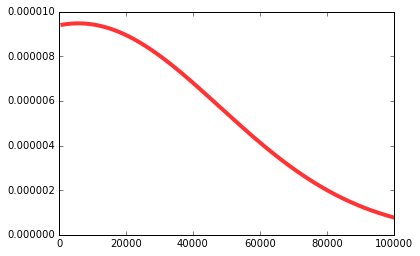

In [66]:
x = expon.fit(pib[pib.PIB < 1000000].PIB)
print(mean)
print(std)

mu = mean
sigma = std
x = np.linspace(1000, 100000, 100000)
plt.plot(x, norm.pdf(x,loc=mu,scale=sigma),'red',alpha=0.8,lw=4) # Plota a densidade de probabilidade de distribuição

Plotamos um histograma da variável PIB, usamos um filtro no valor de 1.000.000,00. Uma quantia alta para o estudo do PIB, por exemplo. Ficou claro que se trata do gráfico de uma exponencial. Outro ponto importante é que a função fit() que consegui estimar os parâmetros, acertou com precisção a média, porém errou o desvio padrão do filtro.